     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='ob

([<matplotlib.patches.Wedge at 0x7c45c5e74ca0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33'),
  Text(0.30000008108314646, -0.5196151954572783, '33')])

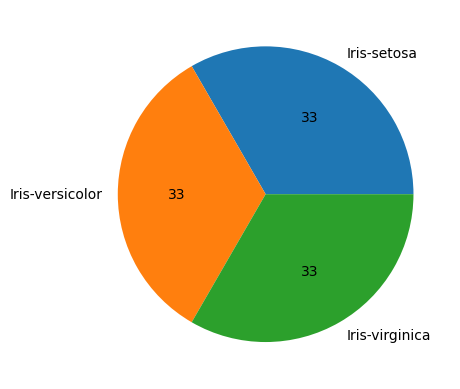

In [1]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

# Cargar archivo 'iris.data'
file_name = 'iris.data'

# Nombres de las columnas
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Leer el archivo y agregar nombres de las columnas
iris = pd.read_csv(file_name, sep=',', header=None, names=column_names)

# Mostrar el dataframe
print(iris)
iris

# Verificar los nombres de las columnas
print(iris.columns)

# revisando cuantos valores hay por cada clase
counts = iris["class"].value_counts()
plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

In [2]:
# reemplazar los nombres de las clases por números para el clasificador
df3 = iris.copy()
df3["class"] = df3["class"].replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = iris.iloc[:, 0:4] # X seran todas las filas con las columnas de la 0 a la 4 (anchos y altos)
y = iris.iloc[:, 4:] # y seran los nombres de las especies (etiquetas de clasificación)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 101)

print(f'Número total de muestras en el dataset: {len(X)}')
print("*****"*10)
print(f'Muestras para entrenamiento: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Muestras para validación: {len(X_test)}')
print(f'Tamaño de X_test: {X_test.shape}')


Número total de muestras en el dataset: 150
**************************************************
Muestras para entrenamiento: 97
Tamaño de X_train: (97, 4)
**************************************************
Muestras para validación: 53
Tamaño de X_test: (53, 4)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el escalador y ajustar-transformar los datos de entrenamiento
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Transformar los datos de prueba (usando el mismo escalador ajustado)
X_test = sc.transform(X_test)

# Asegurarse de que y_train y y_test sean arrays unidimensionales
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Crear y entrenar el modelo SVM
model = SVC()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
pred = model.predict(X_test)

# Calcular y mostrar el puntaje de entrenamiento
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100:.2f}%')

# Calcular y mostrar el puntaje de prueba
test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100:.2f}%')

#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)


Train score of trained model: 96.91%
Test score of trained model: 98.11%


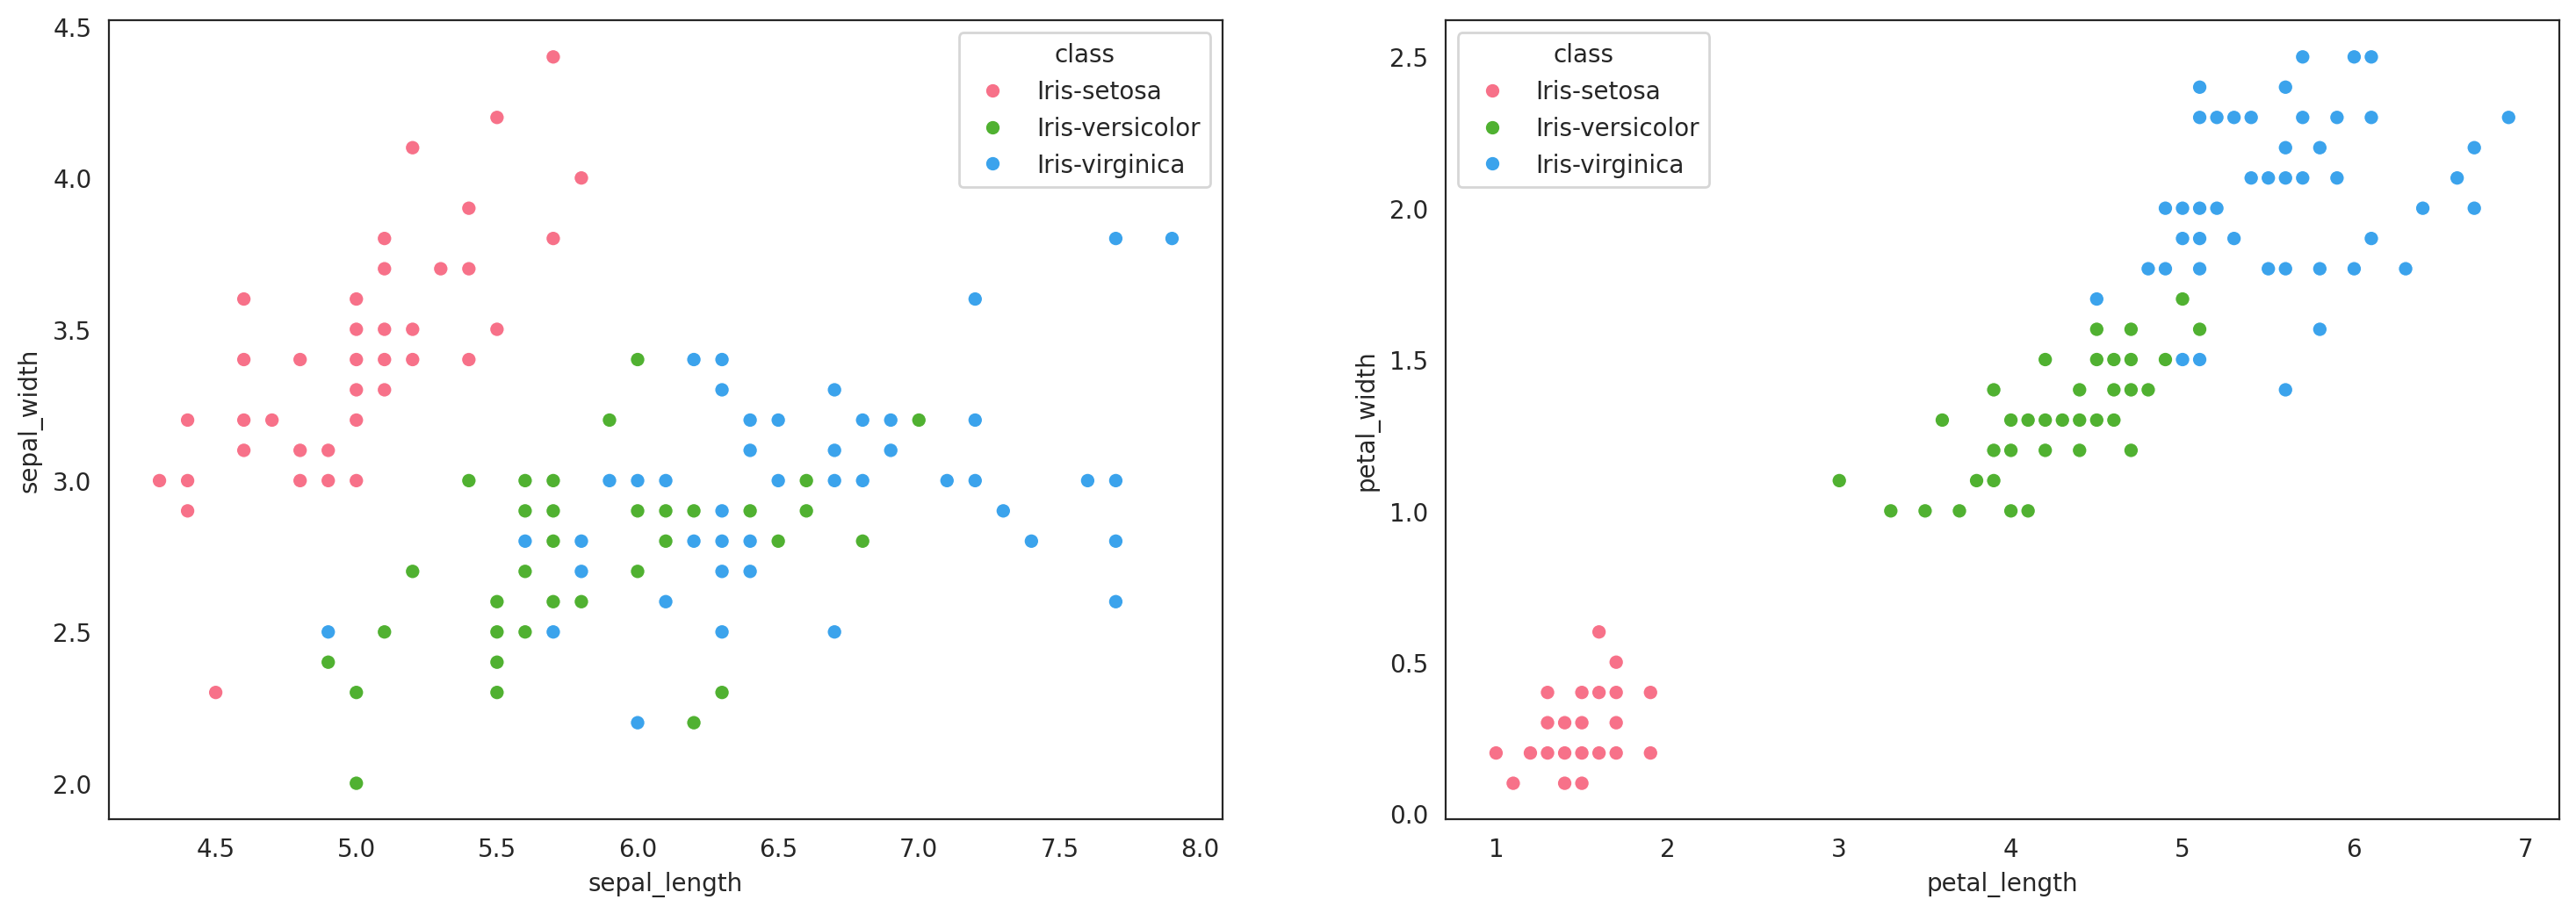

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la paleta de colores
svm_palette = sns.color_palette("husl", 3)

# Visualizando las características en un análisis multivariado, en este caso graficaremos sepalo (ancho y alto)  y pétalo (ancho y alto)
plt.figure(figsize=(18,13), dpi = 200)
sns.set_style('white')
plt.subplot(2,2,1)
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'class', data = iris, palette=svm_palette)
plt.subplot(2,2,2)
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'class', data = iris, palette=svm_palette);

In [5]:
# Calcular el promedio de las características por clase
import pandas as pd
from scipy.spatial import distance

# Calcular el promedio de las características por clase
mean_by_class = iris.groupby('class').mean()
print("Promedio de las características por clase:")
print(mean_by_class)

# Obtener el mínimo y máximo de cada característica por clase
#min_by_class = iris.groupby('class').min(axis=1)
#max_by_class = iris.groupby('class').max(axis=1)

#print("\nMínimos por clase:")
#print(min_by_class)

#print("\nMáximos por clase:")
#print(max_by_class)

# Obtener los promedios de las características para las clases
class_1 = 'Iris-setosa'
class_2 = 'Iris-versicolor'
class_3 = 'Iris-virginica'

mean_class_1 = mean_by_class.loc[class_1].values
mean_class_2 = mean_by_class.loc[class_2].values
mean_class_3 = mean_by_class.loc[class_3].values

#print("mean_class_1 = ", mean_class_1)
#print("mean_class_2 = ", mean_class_2)
#print("mean_class_3 = ", mean_class_3)

diferencia = mean_class_1 - mean_class_2
print("diferencia entre clase 1 y clase 2 = ",diferencia)

# Calcular el mínimo y máximo para cada clase
min_class_1 = np.min(mean_class_1)
max_class_1 = np.max(mean_class_1)

min_class_2 = np.min(mean_class_2)
max_class_2 = np.max(mean_class_2)

min_class_3 = np.min(mean_class_3)
max_class_3 = np.max(mean_class_3)

print(f'Mínimos y máximos de {class_1}: Mínimo = {min_class_1}, Máximo = {max_class_1}')
print(f'Mínimos y máximos de {class_2}: Mínimo = {min_class_2}, Máximo = {max_class_2}')
print(f'Mínimos y máximos de {class_3}: Mínimo = {min_class_3}, Máximo = {max_class_3}')

# Calcular la distancia euclidiana entre los promedios
euclidean_dist = distance.euclidean(mean_class_1, mean_class_2)

print(f"Distancia euclidiana entre clase 1 y clase 2: {euclidean_dist:.4f}")



Promedio de las características por clase:
                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026
diferencia entre clase 1 y clase 2 =  [-0.93   0.648 -2.796 -1.082]
Mínimos y máximos de Iris-setosa: Mínimo = 0.24400000000000002, Máximo = 5.006
Mínimos y máximos de Iris-versicolor: Mínimo = 1.3259999999999998, Máximo = 5.936
Mínimos y máximos de Iris-virginica: Mínimo = 2.026, Máximo = 6.587999999999999
Distancia euclidiana entre clase 1 y clase 2: 3.2052


             class  sepal_length  sepal_width  petal_length  petal_width
0      Iris-setosa         5.006        3.418         1.464        0.244
1  Iris-versicolor         5.936        2.770         4.260        1.326
2   Iris-virginica         6.588        2.974         5.552        2.026


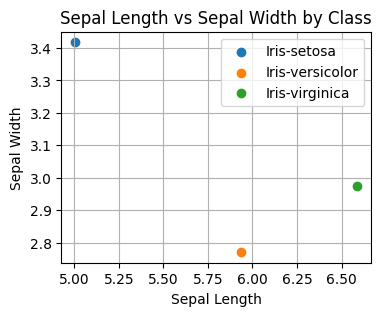

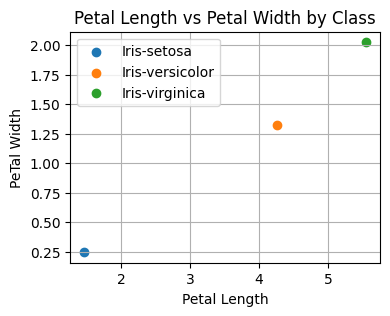

In [6]:
# Crear el DataFrame con los datos proporcionados
df = mean_by_class

# Resetear el índice para convertir 'class' en una columna
df = df.reset_index()

# Imprimir las primeras filas para verificar la estructura del dataset
print(df.head())

# Crear la gráfica de sépalos
plt.figure(figsize=(4, 3))

# Graficar puntos para cada clase
for i, row in df.iterrows():
    plt.scatter(row['sepal_length'], row['sepal_width'], label=row['class'])

# Etiquetas de los ejes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width by Class')

# Mostrar leyenda
plt.legend()

# Mostrar gráfica
plt.grid(True)
plt.show()


# Crear la gráfica de pétalos
plt.figure(figsize=(4, 3))

# Graficar puntos para cada clase
for i, row in df.iterrows():
    plt.scatter(row['petal_length'], row['petal_width'], label=row['class'])

# Etiquetas de los ejes
plt.xlabel('Petal Length')
plt.ylabel('PeTal Width')
plt.title('Petal Length vs Petal Width by Class')

# Mostrar leyenda
plt.legend()

# Mostrar gráfica
plt.grid(True)
plt.show()

clase 1 Iris-setosa
clase 2 Iris-versicolor
vec1 [5.006 3.418 1.464 0.244]
vec2 [5.936 2.77  4.26  1.326]
clase 1 Iris-setosa
clase 2 Iris-virginica
vec1 [5.006 3.418 1.464 0.244]
vec2 [6.588 2.974 5.552 2.026]
clase 1 Iris-versicolor
clase 2 Iris-virginica
vec1 [5.936 2.77  4.26  1.326]
vec2 [6.588 2.974 5.552 2.026]

Distancias entre Iris-setosa y Iris-versicolor:
  Euclidiana: 3.2051745662288034
  Manhattan: 5.4559999999999995

Distancias entre Iris-setosa y Iris-virginica:
  Euclidiana: 4.752591714001951
  Manhattan: 7.896000000000001

Distancias entre Iris-versicolor y Iris-virginica:
  Euclidiana: 1.6204888151419004
  Manhattan: 2.848



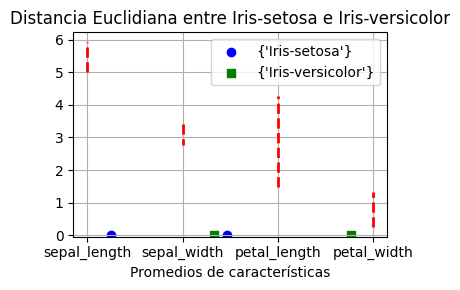

In [7]:
import numpy as np
from math import sqrt
from scipy.spatial import distance
from numpy.linalg import norm


def euclidean_distance(X, Y):
    """
    Calcula la distancia euclidiana entre dos puntos clases

    Retorna:
    float: Distancia euclidiana entre las dos clases.
    """
    X = np.array(X)
    Y = np.array(Y)

    return np.sqrt(np.sum((X - Y)**2))

def manhattan_distance(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    return np.sum(np.abs(X - Y))


def chebyshev_distance(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    return np.max(np.abs(X - Y))

# Cálculo de distancias
# Como se tienen los promedios de cada clase calculados previamente
# Calcular distancias entre pares de clases
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

distances = {}
for i in range(len(classes)):
    for j in range(i + 1, len(classes)):
        class1 = classes[i]
        print("clase 1",class1)
        class2 = classes[j]
        print("clase 2",class2)
        vec1 = mean_by_class.loc[class1].values
        print("vec1",vec1)
        vec2 = mean_by_class.loc[class2].values
        print("vec2",vec2)

        euclidean_dist = euclidean_distance(vec1, vec2)
        manhattan_dist = manhattan_distance(vec1, vec2)
        #chebyshev_distance = chebyshev_distance(vec1, vec2)

        distances[(class1, class2)] = {
            'euclidean': euclidean_dist,
            'manhattan': manhattan_dist,
            #'chebyshev': chebyshev_distance
        }
print()
# Imprimir resultados
for pair, dist in distances.items():
    print(f"Distancias entre {pair[0]} y {pair[1]}:")
    print(f"  Euclidiana: {dist['euclidean']}")
    print(f"  Manhattan: {dist['manhattan']}")
    #print(f"  Chebyshev: {dist['chebyshev']}")
    print()

# Graficar las distancias
plt.figure(figsize=(4, 3))

# Etiquetas de las características
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Marcadores para las clases al inicio y final
plt.scatter(mean_class_1, np.zeros_like(mean_class_1), color='blue', marker='o', label={class_1})
plt.scatter(mean_class_2, np.zeros_like(mean_class_2), color='green', marker='s', label={class_2})

# Dibujar líneas que conectan los puntos correspondientes
for i in range(len(labels)):
    plt.plot([labels[i], labels[i]], [mean_class_1[i], mean_class_2[i]], color='red', linestyle='--', linewidth=2)

# Etiquetas y leyenda
plt.xlabel('Promedios de características')
plt.title(f'Distancia Euclidiana entre {class_1} e {class_2}')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

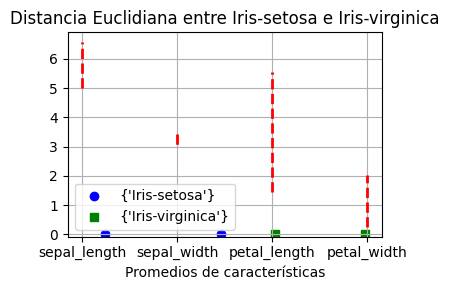

In [8]:

# Graficar las distancias
plt.figure(figsize=(4, 3))

# Etiquetas de las características
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Marcadores para las clases al inicio y final
plt.scatter(mean_class_1, np.zeros_like(mean_class_1), color='blue', marker='o', label={class_1})
plt.scatter(mean_class_3, np.zeros_like(mean_class_3), color='green', marker='s', label={class_3})

# Dibujar líneas que conectan los puntos correspondientes
for i in range(len(labels)):
    plt.plot([labels[i], labels[i]], [mean_class_1[i], mean_class_3[i]], color='red', linestyle='--', linewidth=2)

# Etiquetas y leyenda
plt.xlabel('Promedios de características')
plt.title(f'Distancia Euclidiana entre {class_1} e {class_3}')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

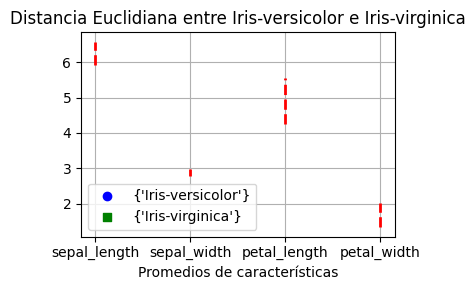

In [9]:
# Graficar las distancias
plt.figure(figsize=(4, 3))

# Etiquetas de las características
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Marcadores para las clases al inicio y final
plt.scatter(mean_class_2, np.zeros_like(mean_class_2), color='blue', marker='o', label={class_2})
plt.scatter(mean_class_3, np.zeros_like(mean_class_3), color='green', marker='s', label={class_3})

# Dibujar líneas que conectan los puntos correspondientes
for i in range(len(labels)):
    plt.plot([labels[i], labels[i]], [mean_class_2[i], mean_class_3[i]], color='red', linestyle='--', linewidth=2)

# Etiquetas y leyenda
plt.xlabel('Promedios de características')
plt.title(f'Distancia Euclidiana entre {class_2} e {class_3}')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

**Conclusión:**

La gráfica muestran las distancias euclidianas entre las especies Iris-setosa, Iris-versicolor e Iris-virginica en cuatro dimensiones: sepal_length, sepal_width, petal_length y petal_width. Observamos que las distancias varían según la característica medida. Esto sugiere que un modelo puede utilizar estas medidas para agrupar datos en función de la similitud en estas características.

Si no se tiene la etiqueta de especie ('Iris-setosa',  'Iris-versicolor' o 'Iris-virginica') en el dataset, se podría emplear medidas de distancia para intentar identificar el número de especies presentes en los datos.

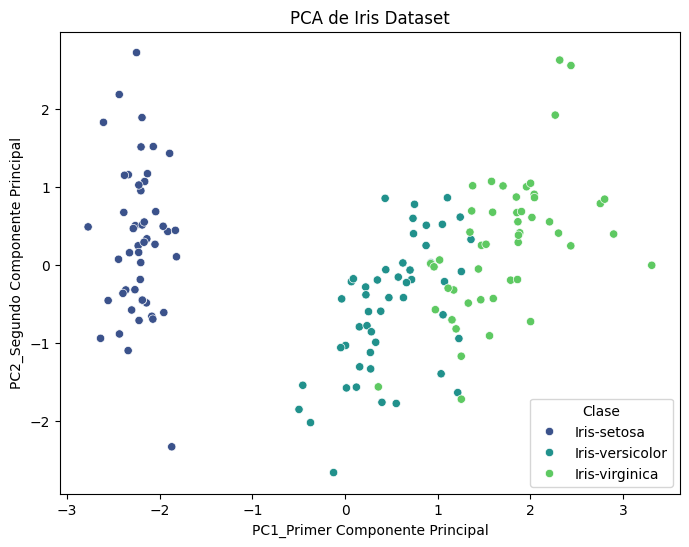

Varianza explicada por el primer componente principal: 72.77%
Varianza explicada por el segundo componente principal: 23.03%


In [10]:
#Principal Component Analysis (PCA) es una técnica de reducción de dimensionalidad
#que se utiliza para transformar un conjunto de datos de alta dimensión en un
#conjunto de datos de menor dimensión, conservando la mayor cantidad posible
#de la variabilidad original.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las características y las etiquetas
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y

# Visualizar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='viridis')
plt.title('PCA de Iris Dataset')
plt.xlabel('PC1_Primer Componente Principal')
plt.ylabel('PC2_Segundo Componente Principal')
plt.legend(title='Clase')
plt.show()

# Mostrar la cantidad de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por el primer componente principal: {explained_variance[0]*100:.2f}%')
print(f'Varianza explicada por el segundo componente principal: {explained_variance[1]*100:.2f}%')

UMAP (Uniform Manifold Approximation and Projection) es una técnica de reducción de dimensionalidad que se utiliza para la visualización y el análisis de datos de alta dimensión. A continuación se muestra los resultados con UMAP, usando la biblioteca umap-learn con el dataset Iris.

In [11]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


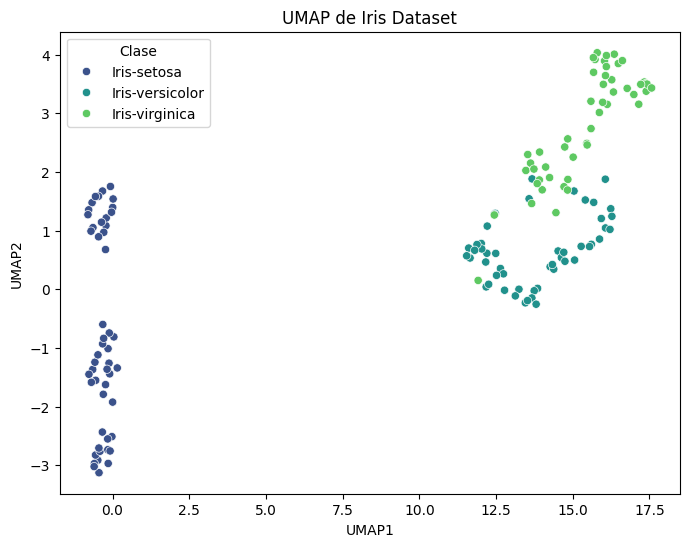

In [12]:
import warnings
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Silenciar advertencias específicas
warnings.filterwarnings("ignore", category=UserWarning, module='umap')

# Cargar el dataset Iris
file_name = 'iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(file_name, sep=',', header=None, names=column_names)

# Separar las características y las etiquetas
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Crear un DataFrame con los componentes UMAP
umap_df = pd.DataFrame(data=X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['class'] = y

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='class', data=umap_df, palette='viridis')
plt.title('UMAP de Iris Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Clase')
plt.show()
